# PyTorch - Vortrag
### HTW Berlin - Angewandte Informatik
#### Modul "Ausgewählte Kapitel sozialer Webtechnologien" (aka Neuronale Netze)

##### Diletta Calussi - s0559842

# Inhalte

0. Notwendige Packages
1. Das Framework PyTorch
2. PyTorch Fundamentals: Tensors, NumPy Bridge, Variablen, Autograd und CUDA
3. Neuronale Netze in PyTorch
5. Quellen

## 0. Notwendige Packages

- torch (CUDA oder CPU Version)
- torchvision
- numpy
- scikit-learn
- matplotlib

## 1. Das Framework PyTorch

- Eine ML Open-Source-Bibliothek für python
- Basiert auf der in **Lua** geschriebenen Bibliothek **Torch**
- Vom Facebook-Forschungsteam für K.I. entwickelt 
- Erscheinungsjahr: 2016
- Unterstützt GPU sowie CPU 
- High Level 


### Funktionen
* Autograd-System zur Berechnung der Ableitungen bezuüglich einer trainierbaren Variablen
* Dynamische Graph-Berechnung 
    - Anzahl von Neuronen kann sich zur Laufzeit verändern
    - If und else-Verzweigungen nach Zweck einstellbar
* NumPy Bridge

Eine Anleitung für die Installation ist auf der Webseite von [PyTorch](https://pytorch.org/) verfügbar.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installation check
import torch
print("Torch version:", torch.__version__)
print("CUDA is active:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

Torch version: 0.4.0
CUDA is active: True
CUDA version: 8.0


In [4]:
torch.manual_seed(0)

## 2. PyTorch Fundamentals

PyTorch bietet zwei Abstraktionen für Datenstrukturen: Tensoren und Variablen. Tensoren sind so ähnlich wie NumPy-Arrays und können auch auf GPUs übertragen werden. 

### 2.1 Tensoren

Ein `torch.Tensor` ist eine mehrdimensionale Matrix, die Elemente von einem bestimmten Datentyp enthält. Ein detaillierter Überblick der unterstützten Datentype ist auf der [Webseite von PyTorch](https://pytorch.org/docs/stable/tensors.html) verfügbar.  

PyTorch unterstützt sowohl GPU- als auch CPU-Tensoren. Tensoren verfügen über folgende Attribute:
- `dtype`, leifert Datentyp
- `device`, das Gerät (CPU oder GPU), wo das Tensorobjekt verwendet wird
- `layout`, Speicherlayout von einem Tensor

Methoden wie:
- `to()`, switching zwischen GPU und CPU



#### Vectors (1-D Tensoren)

Ein Array von Elementen:

In [5]:
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size()

torch.Size([6])

In [6]:
temp2 = torch.randint(1,5,(10,))
print(temp2)
temp2.size()

tensor([ 1.,  4.,  2.,  1.,  4.,  4.,  4.,  4.,  2.,  4.])


torch.Size([10])

#### Matrix (2-D Tensoren)

In [7]:
#Tensor erzeugen
x = torch.randn(5,3)
x

tensor([[ 0.1604, -0.6065, -0.7831],
        [ 1.0622, -0.2613,  1.0667],
        [ 0.4159,  0.8396, -0.8265],
        [-0.7949, -0.9528,  0.3717],
        [ 0.4087,  1.4214,  0.1494]])

#### 3D Tensors

Bilderdateien: `height * width * channel`:

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Read a panda image from disk using a library called PIL and convert it to numpy array
panda = np.array(Image.open('panda.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

torch.Size([224, 224, 3])

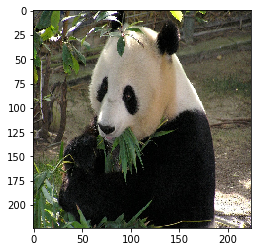

In [10]:
plt.imshow(panda)

#### Operationen auf Tensoren

In [11]:
a = torch.randint(1,10,(2,3))
b = torch.randint(1,10,(2,3))

In [12]:
print(a)
print()
print(b)

tensor([[ 8.,  8.,  2.],
        [ 6.,  5.,  8.]])

tensor([[ 6.,  8.,  5.],
        [ 3.,  6.,  5.]])


In [13]:
#Elementwise Operationen
print("Elementwise-Operationen:")
print("Addition: \n", torch.add(a,b), "\noder:", a+b)
print("*"*60)
print("Subtraktion:\n", torch.sub(a,b), "\noder:", a-b)
print("*"*60)
print("Multiplikation:\n", torch.mul(a,b), "\noder:", a*b)
print("*"*60)
print("Division:\n", torch.div(a,b), "\noder:", a/b)

Elementwise-Operationen:
Addition: 
 tensor([[ 14.,  16.,   7.],
        [  9.,  11.,  13.]]) 
oder: tensor([[ 14.,  16.,   7.],
        [  9.,  11.,  13.]])
************************************************************
Subtraktion:
 tensor([[ 2.,  0., -3.],
        [ 3., -1.,  3.]]) 
oder: tensor([[ 2.,  0., -3.],
        [ 3., -1.,  3.]])
************************************************************
Multiplikation:
 tensor([[ 48.,  64.,  10.],
        [ 18.,  30.,  40.]]) 
oder: tensor([[ 48.,  64.,  10.],
        [ 18.,  30.,  40.]])
************************************************************
Division:
 tensor([[ 1.3333,  1.0000,  0.4000],
        [ 2.0000,  0.8333,  1.6000]]) 
oder: tensor([[ 1.3333,  1.0000,  0.4000],
        [ 2.0000,  0.8333,  1.6000]])


Für eine Matrizenmultiplikation muss der Tensor resized werden.
Dafür sind in PyTorch die Funktionen:
- [`reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape), 
- [`resize_()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_) und 
- [`view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view)


In [14]:
print(a.shape)
print(b.shape)

#Reshaping mit reshape
resh_b = b.reshape(3,2)
print(resh_b.shape)
torch.mm(a,resh_b)

torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([3, 2])


tensor([[ 100.,   98.],
        [ 109.,  103.]])

In [15]:
#Reshaping mit resize
res_b = b.resize(3,2)
print(res_b.shape)
torch.mm(a,res_b)

torch.Size([3, 2])


tensor([[ 100.,   98.],
        [ 109.,  103.]])

In [16]:
#Reshaping mit view
b_view = b.view(3,2)
torch.mm(a,b_view)

tensor([[ 100.,   98.],
        [ 109.,  103.]])

### 2.2 NumPy Bridge

In [17]:
import numpy as np
import torch
np.random.seed(0)

In [18]:
x = np.zeros((2,3))
y = torch.zeros(2,3)

print(type(x), x.dtype)
print(type(y), y.dtype)

<class 'numpy.ndarray'> float64
<class 'torch.Tensor'> torch.float32


In [19]:
#Automatisches Casting numpy zu torch
z = x + y
print(type(z), z.dtype)
print(z)

<class 'torch.Tensor'> torch.float64
tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]], dtype=torch.float64)


In [20]:
print("Vor Umwandlung: \n", z)
#Umwandlung zu numpy
#Die zwei Objekte teilen den Speicherraum!

#Umwandlung nach numpy
xx = z.numpy()
#Veräderung des Wertes von z (!)
xx += 1.0

print("Nach Umwandlung:\n", z)

Vor Umwandlung: 
 tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]], dtype=torch.float64)
Nach Umwandlung:
 tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)


In [21]:
#axis vs dim
x = np.random.randint(1, 10,(2,3))
print(x)
x.mean(axis=1)

[[6 1 4]
 [4 8 4]]


array([3.66666667, 5.33333333])

In [22]:
y = torch.randint(1,10,(2,3))
print(y)
y.mean(dim=1)

tensor([[ 9.,  6.,  6.],
        [ 5.,  3.,  3.]])


tensor([ 7.0000,  3.6667])

## 2.4 Variables

Bis zur Version 0.4. galten Variablen in PyTorch als Wrapper um Tensoren in einem Graphen:
<div>
<img src="linear_transformation_graph.png" align="left" width=200>
<strong>Quelle: "Deep Learning with PyTorch", Packt Publishing</strong> 
</div>

Kreise im Graphen sind `Variablen`. Sie enthalten eine Referenz zum Tensor, zu seinem Gradienten und zur Funktion, die zu ihrer Erstellung beigetragen hat. Für `a` wäre die Funktion eine Multiplikation. Für `y` eine Addition.

Ab der Version 0.4. ist der Wrapper um einen Tensor nicht mehr notwendig.

Für die Berechnung des Graadienten verwendet PyTorch das Autograd-System.

### 2.5 Autograd: Gradienten in PyTorch

Das Package `torch.autograd` bietet die Möglichkeit zur automatischen Berechnung der Ableitung bezüglich einer Variablen, die zu einem Computation Graphen gehört.

Um die Funktionalität zu nutzen, muss das Flag `requires_grad` bei Tensordeklaration auf `True` gesetzt werden.

Beispiel aus der Übung:

In [23]:
# External Modules
from graphviz import Digraph
import numpy as np
import hashlib
import torch
from torch.autograd import Variable

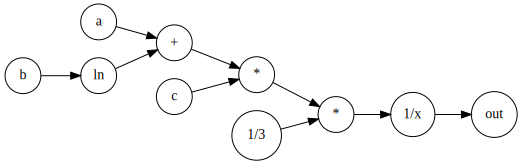

In [24]:
# creating empty graph ad set some attributes
f = Digraph('computational_graph', filename='graph_clean.gv')
f.attr(rankdir='LR')
f.attr('node', shape='circle')

# create the graph
f.node('a')
f.node('b')
f.node('c')
f.edge('a', '+', label='')
f.edge('b', 'ln', label=' ')
f.edge('ln', '+', label=' ')
f.edge('+','* ', label=' ')
f.edge('c','* ')
f.edge('* ', '*')
f.edge('1/3 ', '*')
f.edge('*','1/x')
f.edge('1/x','out')

f

Im Graphen sind 3 Variablen:
- a (2)
- b (e)
- c (3)

Setzt man das Flag von diesen Variablen auf True, dann werden all die Operationen, die diese Variablen betreffen, vom Framework automatisch registriert. 

Am Ende eines Forward-Schrittes ist es möglich, die Funktion `backward()` aus `torch.autograd` aufzurufen, die den Backward-Pass brechnet. 

Jeder Tensor bzw. jede Variable in einem Graphen verfügt über Attributen bezüglich Gradienten, erzeugender Funktion: 
- `grad` liefert Wert des Gradiente
- `grad_fn` zeigt die auf der Variablen angewandte Operationsart (Logarithmus, Summe, Multiplikation, usw.)

In [25]:
#Tensor deklariation
a = torch.tensor(2., requires_grad=True)

#Vor Version 0.4:
a_var = Variable(torch.tensor(2., requires_grad=True))

b = torch.tensor(np.e, requires_grad=True)
c = torch.tensor(3., requires_grad=True)
dummy = torch.tensor(1)
print(a, b, c)
print("Variable a: ", a)

tensor(2.) tensor(2.7183) tensor(3.)
Variable a:  tensor(2.)


In [26]:
print(a.grad, b.grad, c.grad, dummy.grad)
print(a.requires_grad, b.requires_grad, c.requires_grad, dummy.requires_grad)

None None None None
True True True False


In [27]:
def applyExerciseFunction(a,b,c):
    ln = torch.log(b)
    print(ln.grad_fn)
    x = a + ln 
    print(x.grad_fn)
    x = c * x
    print(x.grad_fn)
    x = (1./3.)*x
    print(x.grad_fn)
    out = 1./x
    print(out.grad_fn)
    return out

In [28]:
out =  applyExerciseFunction(a,b,c) #1/3
print("Ergebnis aus Fowardpass: ", out) #1./3.

Ergebnis aus Fowardpass:  tensor(0.3333)


In [29]:
out.backward(retain_graph=True)#retain_graph bei großen Berechnungen nicht verwenden

In [30]:
print("dout/da: ", a.grad)
print("dout/db: ", b.grad)
print("dout/dc: ", c.grad)

dout/da:  tensor(-0.1111)
dout/db:  tensor(1.00000e-02 *
       -4.0875)
dout/dc:  tensor(-0.1111)


In [31]:
z = dummy + 2
print(z.grad_fn)
try:
    z.backward()
except RuntimeError as e:
    print("Exception:", e)
print(dummy.grad)

None
Exception: element 0 of tensors does not require grad and does not have a grad_fn
None


### 2.5 CUDA und PyTorch

PyTorch unterstützt [CUDA](https://pytorch.org/docs/stable/notes/cuda.html), also GPU-Berechnungen. Tensors können mit `.cuda()` und `.cpu()` hin und her gepspeichert werden.

In [32]:
x = torch.randn((60,7))
y = torch.randn((60,7))

cuda = torch.device('cuda')     # Default CUDA device

if torch.cuda.is_available():
    # transfers a tensor from CPU to GPU 1
    x = x.cuda()
    y = y.to(device=cuda)
    z = torch.randint(10, (60,7), device=cuda)
result = x+y+z

In [33]:
print(x.device, y.device, z.device)

cuda:0 cuda:0 cuda:0


In [34]:
x_cpu = x.cpu()
y_cpu = y.cpu()

print(x_cpu.device)
print(y_cpu.device)

cpu
cpu


## 3. Neuronale Netze in PyTorch: `torch.nn` und `torchvision`

### Das Package `torch.nn`

Neuronale Netze können in PyTorch einfach mit dem Objekten und Funktionen aus dem Modul [`torch.nn`](https://pytorch.org/docs/stable/nn.html#) erzeugt werden.

Das Package bietet Klassen für 
* die allgemeine Definition eines Modells (sog. [Container](https://pytorch.org/docs/stable/nn.html#containers)), sowie dessen 
* Layers, 
* Aktivierungsfunktionen, 
* Kostenfuntkionen ([Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions))

Optimizer sind im Package [`torch.optim`](https://pytorch.org/docs/stable/optim.html#module-torch.optim) zu finden.
Funktionen sind auch im Package `torch.nn.functional` verfügbar.


### Das Package `torchvision`

Viele Datensätze sind mit dem Package [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision-datasets) verfügbar.
Vortrainierte Modelle sind in [`torchvision.models`](https://pytorch.org/docs/stable/torchvision/models.html#torchvision-models) enthalten.

Außerdem bietet `torchvision` das Package `torchvision.transforms` mit Funktionen zur Verarbeitung von Bildern.

Transformationen sind übliche Bildverarbeitungsmöglichkeiten, die mittels `Compose` verkettet werden können, wie z.B. Padding mit `Pad`, Rotation, Zuschneiden, redimensionieren, Skalierung, sowie Umwandlungen von und nach Tensoren:
- `ToTensor()` wandelt ein Bild in ein Tensor und reduziert automatisch den Range von $[0,255]$ zu $[0,1]$
- `Normalize()` verändert ien Bild mit einem festen Durchschnitt (mean) und fester Standardabweichung. Die Normalisierung erfolgt folgendermaßen:
$ input[channel] = (input[channel] - mean[channel]) / std[channel] $ (siehe ["Transforms on torch.*Tensor"](https://pytorch.org/docs/stable/torchvision/transforms.html#transforms-on-torch-tensor).


## 3.1 Modell definieren

Notwendige Schritte:

1. Input-Daten
2. Netzwerk-Architektur:
    - Layers
    - Funktionen
3. Loss-Funktion
4. Netzwerk-Optimizer

<img src="architecture.png" align="left">
<strong>Quelle: "Deep Learning with PyTorch", Packt Publishing </strong>
Anmerkung: Ab der Version 0.4 kann Variable ein Tensor sein!

### Input-Daten: MNIST-Dataset

In [35]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

In [36]:
batch_size = 100

In [37]:
# Define a transform to normalize the data
transformation = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,), (0.3081,))])


transformation

Compose(
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
)

In [38]:
train_dataset = datasets.MNIST('data/',train=True,transform=transformation,download=True)
test_dataset = datasets.MNIST('data/',train=False,transform=transformation,download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [39]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.1307,), std=(0.3081,))
                         )
    Target Transforms (if any): None

In [40]:
#Packt publishing
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image,cmap='binary', interpolation='bicubic')

torch.Size([100, 1, 28, 28])


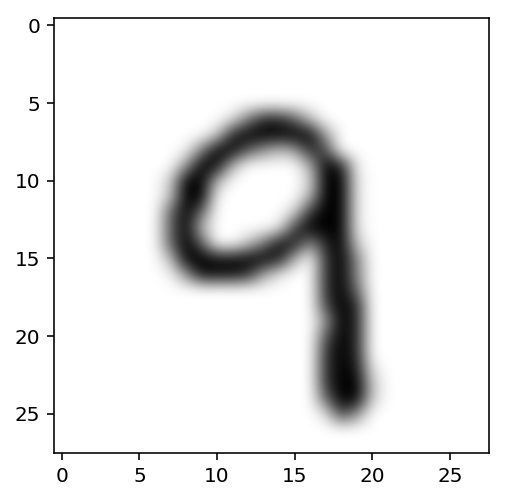

In [41]:
sample_data = next(iter(train_loader))
plot_img(sample_data[0][2])
print(sample_data[0].shape)

### Netzwerk-Architektur: Layers in PyTorch

Lineare Transformation:
$y = Wx + b$

Ein Layer für eine Lineare Transformation kann man direkt vom Package `torch.nn` mit der Klasse `Linear` erzeugen.

Alle Objekte vom PyTorch Framework können an den Input-Variablen direkt angewendet werden, als wären sie Funktionen!

Beispiel:
- Lineares Layer mit:
    * Input-Features der Dimension 10
    * Output der Dimension 5 (Labels)
    
Wenn keine manuelle Änderungen stattfinden, erzeugt PyTorch Gewichte und Bias-Werte automatisch und in der entsprechenden Dimension.
Hier:
- W Matrix mit Dimension (10x5)
- b Vektor mit Dimension (5x1)

In [42]:
from torch.nn import Linear

In [43]:
myLayer = Linear(in_features=10,out_features=5,bias=True)

In [44]:
inp = Variable(torch.randint(1,5,(1,10))) #Oder direkt der Tensor ab 0.4
print("Input-Werte:\n", inp)
print(inp.size())

Input-Werte:
 tensor([[ 2.,  2.,  1.,  4.,  2.,  4.,  4.,  1.,  4.,  4.]])
torch.Size([1, 10])


In [45]:
#Weights werden vom Framework automatisch erzeugt
print("Gewichte:", myLayer.weight) # W
print(myLayer.weight.size()) #(5,10)
print("Bias:", myLayer.bias) #b
print(myLayer.bias.size()) #(5,1)

Gewichte: Parameter containing:
tensor([[ 0.1073, -0.1884,  0.0481, -0.0568, -0.1302, -0.1255,  0.0132,
         -0.2533,  0.1113, -0.0897],
        [ 0.1987, -0.0909, -0.2683, -0.2091,  0.3072,  0.2642,  0.0669,
         -0.2386,  0.2216,  0.0632],
        [-0.0709, -0.0975,  0.2822,  0.1696, -0.2198, -0.1686,  0.0180,
         -0.2905,  0.1538,  0.1391],
        [ 0.2931,  0.1011, -0.2092, -0.1195, -0.1067,  0.2961, -0.1023,
          0.1521, -0.2199, -0.2651],
        [ 0.0599,  0.2856,  0.2786,  0.1516,  0.1956,  0.0904,  0.2845,
          0.0578, -0.2925, -0.2203]])
torch.Size([5, 10])
Bias: Parameter containing:
tensor([ 0.2717,  0.1467,  0.2478, -0.3028,  0.1329])
torch.Size([5])


In [46]:
myLayer(inp) #Lineare Transformation: berechnet Wx+b

tensor([[-0.9459,  2.0977,  0.7110, -1.4280,  1.6064]])

### Layers verschachteln

In [47]:
myLayer1 = Linear(10,5) #out aus myLayer1
myLayer2 = Linear(5,2) #ist in für myLayer2
myLayer2(myLayer1(inp))

tensor([[-0.1805, -0.0736]])

### Nicht-lineare Aktivierungsfunktionen

In [48]:
import torch

In [49]:
sample_data = Variable(torch.Tensor([[1,2,-1,-1]]))
myRelu = torch.nn.ReLU()
myRelu(sample_data)

tensor([[ 1.,  2.,  0.,  0.]])

In [50]:
sample_data = Variable(torch.Tensor([[1,2,-1,-1]]))
mySigmoid = torch.nn.Sigmoid()
mySigmoid(sample_data)

tensor([[ 0.7311,  0.8808,  0.2689,  0.2689]])

### Variante mit `nn.Module`

In [51]:
from torch import nn

In [52]:
class SimpleClassfier(nn.Module):
    def __init__(self):
        super(SimpleClassfier, self).__init__()
        # Inputs to hidden layer linear transformation        
        self.hidden = nn.Linear(784, 256)#input and output size
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid() 
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)      
        return x

In [53]:
model = SimpleClassfier()
model

SimpleClassfier(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

### Variante mit `nn.functional`

In [54]:
import torch.nn.functional as F

In [55]:
# Mit Sigmoid and Softmax
class SimpleClassfierF(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [56]:
modelF = SimpleClassfierF()
modelF

SimpleClassfierF(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

### Variante mit `nn.Sequential`

In [57]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)
print(model[0]) #Zugriff auf first layer

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)
Linear(in_features=784, out_features=128, bias=True)


### Variante mit `nn.Sequential` und Pipeline als `OrderedDict`

In [58]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
print(model)
print(model[0]) #Zugriff auf fc1
print(model.fc1)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)
Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


### Gewichte und Bias

PyTorch initialisiert automatisch Gewichte und Bias für die Modelle, die aus Klassen im Package `nn` erben.



## 4. Netze in PyTorch

1. Datensatz laden und vorbereiten
2. Modell-Klasse definieren
3. Loss-Criterion festlegen
4. Opzimizer instanzieren
8. Modell trainieren und Genauigkeit berechnen

In [59]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [60]:
is_cuda=False
if torch.cuda.is_available():
    is_cuda = True

### 4.1 SimpleClassifier

Source: https://www.kaggle.com/negation/pytorch-logistic-regression-tutorial

In [61]:
# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [62]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [63]:
model = LogisticRegression(input_size, num_classes)

In [64]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [65]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #[batch_size, 1, 28, 28]
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))


Epoch: [1/10], Step: [100/600], Loss: 1.6007
Epoch: [1/10], Step: [200/600], Loss: 1.1817
Epoch: [1/10], Step: [300/600], Loss: 1.0694
Epoch: [1/10], Step: [400/600], Loss: 0.7769
Epoch: [1/10], Step: [500/600], Loss: 0.9006
Epoch: [1/10], Step: [600/600], Loss: 0.6116
Epoch: [2/10], Step: [100/600], Loss: 0.6411
Epoch: [2/10], Step: [200/600], Loss: 0.7966
Epoch: [2/10], Step: [300/600], Loss: 0.6724
Epoch: [2/10], Step: [400/600], Loss: 0.8100
Epoch: [2/10], Step: [500/600], Loss: 0.5546
Epoch: [2/10], Step: [600/600], Loss: 0.5087
Epoch: [3/10], Step: [100/600], Loss: 0.6567
Epoch: [3/10], Step: [200/600], Loss: 0.5877
Epoch: [3/10], Step: [300/600], Loss: 0.6294
Epoch: [3/10], Step: [400/600], Loss: 0.4328
Epoch: [3/10], Step: [500/600], Loss: 0.5503
Epoch: [3/10], Step: [600/600], Loss: 0.4010
Epoch: [4/10], Step: [100/600], Loss: 0.4871
Epoch: [4/10], Step: [200/600], Loss: 0.3840
Epoch: [4/10], Step: [300/600], Loss: 0.5556
Epoch: [4/10], Step: [400/600], Loss: 0.4888
Epoch: [4/

In [66]:
# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the model on the 10000 test images: 90 %


### 4.2 Feedforward Network

### Modell-Klasse definieren

1. 4 layer fully connected Neuronales Netz
2. Source für Code:
    http://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/
3. Klassifizierung mit Softmax
4. ReLU als Aktivierungsfunktion für alle Layers bis auf das letzte
5. Aktivierungsfunktion im letzten Layer: "log softmax"
6. Loss-Kriterion: NLL (negative log likelihood)

Die Kombination von Log-Softmax und NLL-Kriterion liefert eine mutliclass CrossEntropy basierten Loss-Funktion. 

Mehr dazu: [PyTorch-Kriterion](https://nn.readthedocs.io/en/rtd/criterion/#classnllcriterion)

<img src="CNTK-Dense-example-architecture.jpg">



In [67]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [68]:
class FeedforwardNetwork(nn.Module):
    def __init__(self):
        super(FeedforwardNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 200)#
        self.fc3 = nn.Linear(200, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))#
        x = self.fc3(x)
        return F.log_softmax(x)

In [69]:
model = FeedforwardNetwork()
if is_cuda:
    model.cuda()
model    

FeedforwardNetwork(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

In [70]:
#Hyperparameters
learning_rate = 0.001
epochs = 5
log_interval = 100
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
criterion = nn.NLLLoss()

### Gewichte und Bias anpassen

In [71]:
def adapt_params(model):
    for m in model.modules():
        if type(m) in ['Linear']:
            torch.nn.init.normal_(model.weight.data)
            torch.nn.init.constant_(model.bias.data, 0.1)

In [ ]:
#adapt_params(model)

### Netz trainieren

In [72]:
# run the main training loop
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        #data, target = Variable(data), Variable(target)
        volatile = True
        if is_cuda:
            data, target = data.cuda(), target.cuda()
        data , target = Variable(data,volatile),Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        # Data now: (32, 784)
        data = data.view(-1, 28*28)
        
        #Gradienten zurücksetzen
        optimizer.zero_grad()
        #net_out speichert log_softmax des finalen Schrittes
        net_out = model(data) #ruft forward() methode auf
        #loss = Modell-Fehler nach Forward-Pass
        loss = criterion(net_out, target)
        
        #Backpropagation
        loss.backward() #Liefert Gradienten
        
        #Optimizer == SGD --> Ein SGD Step auf aktuellen Parametern
        optimizer.step() #Aktualisiert Parameter
        
        #Ergebnisse für jede Epoche
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                        100. * batch_idx / len(train_loader), loss.data[0]))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.311378
Train Epoch: 0 [10000/60000 (17%)]	Loss: 1.959563
Train Epoch: 0 [20000/60000 (33%)]	Loss: 1.162646
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.765436
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.594244
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.493297
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.544340
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.305114
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.299789
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.361796
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.323536
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.293291
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.303258
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.171249
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.272825
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.220626
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.415316
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.553564
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.423991
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.235010
Train Epoch: 3 [2000

### Netzwerk testen

In [73]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    volatile = True
    if is_cuda:
        data, target = data.cuda(), target.cuda()
    data , target = Variable(data,volatile),Variable(target)
    data = data.view(-1, 28 * 28)
    net_out = model(data)
    # sum up batch loss
    test_loss += criterion(net_out, target).data[0]
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Average loss: 0.0021, Accuracy: 9373/10000 (93%)



In [74]:
#Zugriff auf Modell-Parameter
model_params = model.named_parameters() #oder auf model.parameters()
for m in model_params:
    print(m)

('fc1.weight', Parameter containing:
tensor([[ 1.9811e-02, -3.4261e-02, -1.0034e-02,  ...,  1.0229e-02,
          1.4594e-02, -7.6429e-03],
        [ 2.0212e-02,  7.4739e-03, -1.5732e-02,  ...,  2.2748e-02,
          2.9705e-02,  4.4363e-03],
        [ 1.4100e-02,  5.0425e-03, -1.9929e-02,  ...,  2.6057e-02,
         -8.8218e-03,  3.2058e-02],
        ...,
        [ 1.2328e-02,  1.7742e-02, -2.8497e-02,  ...,  2.4964e-02,
         -1.2099e-02,  1.9349e-02],
        [-2.1548e-02, -3.2106e-02, -2.5113e-02,  ..., -2.3233e-04,
         -2.7072e-03, -1.6903e-04],
        [ 2.6403e-02, -3.9746e-03, -1.1823e-02,  ..., -6.9642e-03,
         -3.3109e-02, -6.3373e-03]], device='cuda:0'))
('fc1.bias', Parameter containing:
tensor(1.00000e-02 *
       [ 0.8531, -2.7176, -0.2930, -0.6714,  3.0407,  3.9595,  3.0487,
         2.6171, -0.6660, -1.3843,  0.5409,  2.1218,  3.6624,  3.4059,
         3.2866,  2.4423,  0.6907, -0.5015,  3.7297, -0.1536,  0.0762,
         1.3699, -0.5759, -1.0596, -1.6558, 

### 4.3 CNN in PyTorch
Source: 
- "Deep Learning with PyTorch", Packt Publishing
- "Image Kernels", http://setosa.io/ev/image-kernels/

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x): 
        #Pooling: reduce the size of feature maps and the outcomes of convolution layers
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320) #Flattening
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1) #Prediction

In [77]:
model = Net()
if is_cuda:
    model.cuda()

In [78]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [79]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data , target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        
        running_loss += F.nll_loss(output,target,size_average=False).data[0]
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct/len(data_loader.dataset)
    if phase == "training":
        print("Train phase:\t Average loss: {:.4f}, Accuracy: {}/{} -\t {}%".format(loss, running_correct, len(data_loader.dataset), accuracy))
    else:
        print("Test phase:\t Average loss: {:.4f}, Accuracy: {}/{} -\t {}%".format(loss, running_correct, len(data_loader.dataset), accuracy))
    #print(f'{phase} loss is {(loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [80]:
train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]

for epoch in range(1,10):
    epoch_loss, epoch_accuracy = fit(epoch,model,train_loader,phase='training')
    val_epoch_loss , val_epoch_accuracy = fit(epoch,model,test_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

Train phase:	 Average loss: 1.0092, Accuracy: 41468/60000 -	 69%
Test phase:	 Average loss: 0.3263, Accuracy: 9018/10000 -	 90%
Train phase:	 Average loss: 0.3718, Accuracy: 53668/60000 -	 89%
Test phase:	 Average loss: 0.2156, Accuracy: 9364/10000 -	 93%
Train phase:	 Average loss: 0.2692, Accuracy: 55374/60000 -	 92%
Test phase:	 Average loss: 0.1572, Accuracy: 9518/10000 -	 95%
Train phase:	 Average loss: 0.2168, Accuracy: 56236/60000 -	 93%
Test phase:	 Average loss: 0.1218, Accuracy: 9615/10000 -	 96%
Train phase:	 Average loss: 0.1865, Accuracy: 56791/60000 -	 94%
Test phase:	 Average loss: 0.1010, Accuracy: 9669/10000 -	 96%
Train phase:	 Average loss: 0.1653, Accuracy: 57148/60000 -	 95%
Test phase:	 Average loss: 0.0852, Accuracy: 9736/10000 -	 97%
Train phase:	 Average loss: 0.1480, Accuracy: 57489/60000 -	 95%
Test phase:	 Average loss: 0.0814, Accuracy: 9734/10000 -	 97%
Train phase:	 Average loss: 0.1369, Accuracy: 57592/60000 -	 95%
Test phase:	 Average loss: 0.0717, Accu

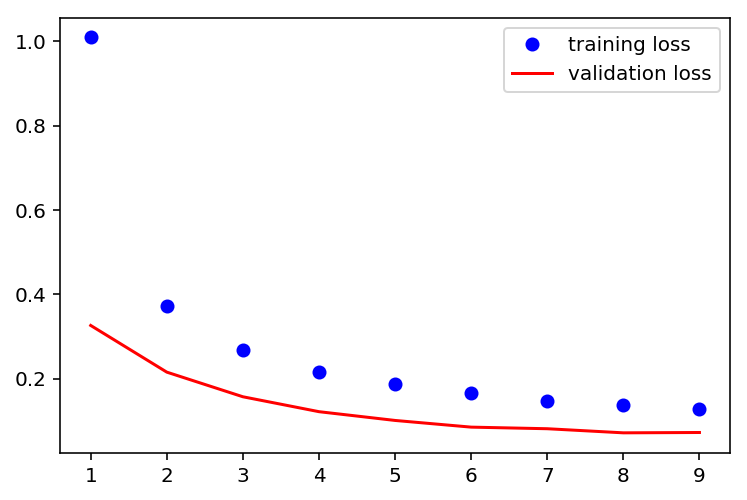

In [81]:
plt.plot(range(1,len(train_losses)+1),train_losses,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label = 'validation loss')
plt.legend()